In [1]:
import pandas as pd
import numpy as np
import random as rnd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC

In [4]:
train_df = pd.read_csv('../Titanic/train.csv')
test_df = pd.read_csv('../Titanic/test.csv')
combine = [train_df, test_df]

In [5]:
train_length = len(train_df['PassengerId'])
test_length = len(test_df['PassengerId'])
total_length = train_length + test_length

,Sex,Survived
0,female,0.742
1,male,0.189


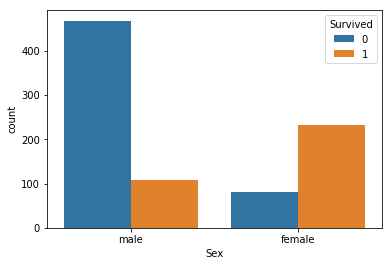

In [6]:
sns.countplot(train_df['Sex'], hue = train_df['Survived'])
display(train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().round(3))

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


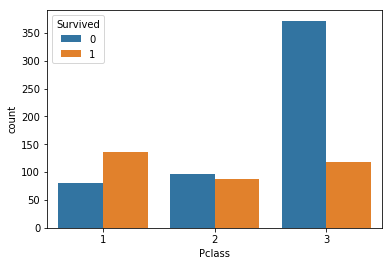

In [7]:
sns.countplot(train_df['Pclass'], hue = train_df['Survived'])
display(train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().round(3))

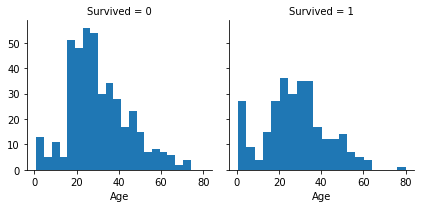

In [8]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [9]:
columns = train_df.columns

In [10]:
for column in columns:
    ratio = (train_df[column].isna().sum()+test_df[column].isna().sum())/total_length
    print('{column}:{ratio}'.format(column=column, ratio=ratio))

PassengerId:0.0
Survived:0.0
Pclass:0.0
Name:0.0
Sex:0.0
Age:0.20091673032849502
SibSp:0.0
Parch:0.0
Ticket:0.0
Fare:0.0007639419404125286
Cabin:0.774637127578304
Embarked:0.0015278838808250573


In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_df = train_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId', 'Embarked'], axis=1)
test_df = test_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId', 'Embarked'], axis=1)
combine = [train_df, test_df]

In [13]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [14]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [15]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [16]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']

train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [17]:
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,0


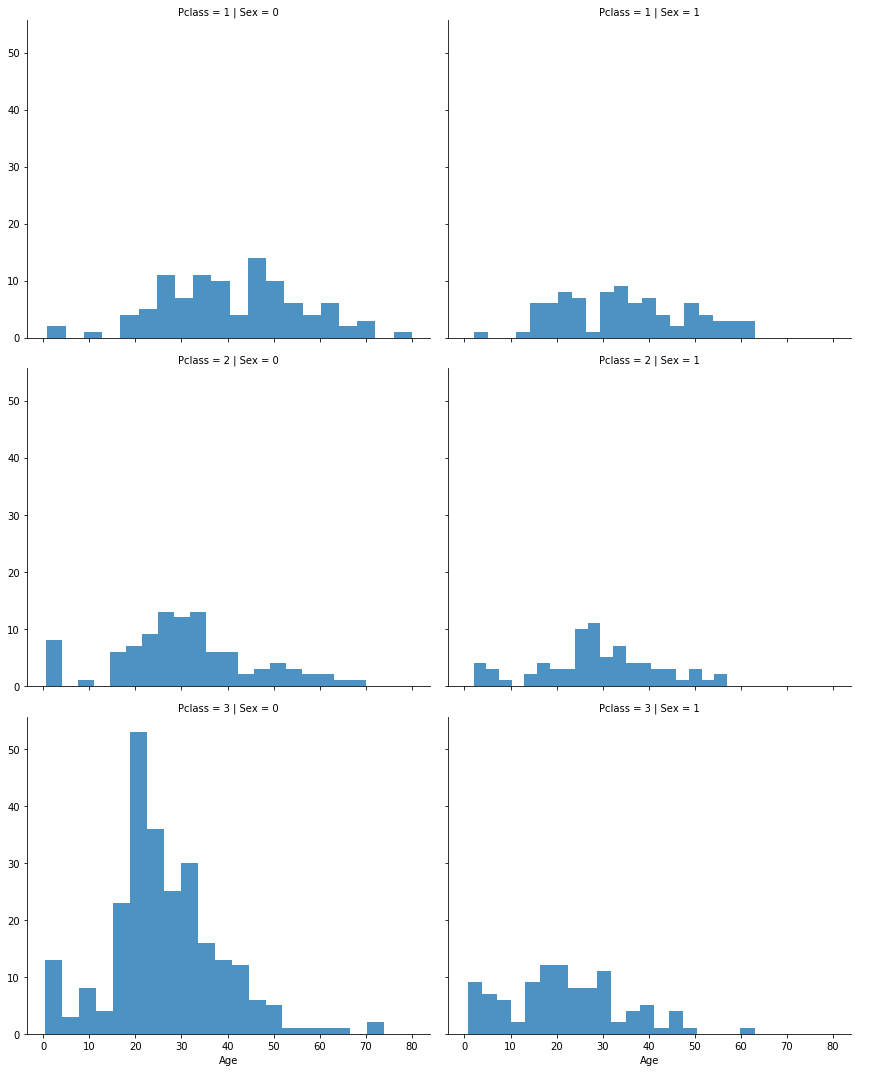

In [18]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=5, aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.8, bins=20)
grid.add_legend()

In [19]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
combine = [train_df, test_df]

In [20]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [21]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int) 

In [22]:
combine = [train_df, test_df]

In [23]:
train_df['Age'].isna().sum()

0

In [24]:
train_df['FareCut'] = pd.qcut(train_df['Fare'], 3)
train_df[['FareCut', 'Survived']].groupby(['FareCut'], as_index=False).mean().sort_values(by='FareCut', ascending=True)

,FareCut,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [25]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 8.662, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8.662) & (dataset['Fare'] <= 26.0), 'Fare'] = 1
    dataset.loc[ dataset['Fare'] > 26, 'Fare'] = 2
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareCut'], axis=1)
combine = [train_df, test_df]

In [26]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,0,22,0,1
1,1,1,1,38,2,1
2,1,3,1,26,0,0
3,1,1,1,35,2,1
4,0,3,0,35,0,0


In [27]:
train_df['AgeCut'] = pd.cut(train_df['Age'], 5)
train_df[['AgeCut', 'Survived']].groupby(['AgeCut'], as_index=False).mean().sort_values(by='AgeCut', ascending=True)

,AgeCut,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [28]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
train_df = train_df.drop(['AgeCut'], axis=1)
combine = [train_df, test_df]   

In [29]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,0,1,0,1
1,1,1,1,2,2,1
2,1,3,1,1,0,0
3,1,1,1,2,2,1
4,0,3,0,2,0,0
5,0,3,0,1,0,0
6,0,1,0,3,2,0
7,0,3,0,0,1,4
8,1,3,1,1,1,2
9,1,2,1,0,2,1


In [30]:
for dataset in combine:
    dataset.loc[ dataset['Family'] == 0, 'Family'] = 0
    dataset.loc[(dataset['Family'] > 0) & (dataset['Family'] <= 3), 'Family'] = 1
    dataset.loc[(dataset['Family'] > 3), 'Family'] = 2
    dataset['Family'] = dataset['Family'].astype(int)
combine = [train_df, test_df]   

In [31]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,0,1,0,1
1,1,1,1,2,2,1
2,1,3,1,1,0,0
3,1,1,1,2,2,1
4,0,3,0,2,0,0
5,0,3,0,1,0,0
6,0,1,0,3,2,0
7,0,3,0,0,1,2
8,1,3,1,1,1,1
9,1,2,1,0,2,1


In [32]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop('Survived', axis=1)
Y_test = test_df["Survived"]
X_train.shape, Y_train.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [33]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
train_svc = round(svc.score(X_train, Y_train) * 100, 2)
test_svc = round(svc.score(X_test, Y_test) * 100, 2)

In [34]:
train_svc

82.72

In [35]:
test_svc

95.93

In [38]:
lda = LDA()
lda.fit(X_train, Y_train)
Y_pred = lda.predict(X_test)
train_lda = round(lda.score(X_train, Y_train) * 100, 2)
test_lda = round(lda.score(X_test, Y_test) * 100, 2)

In [39]:
train_lda

79.57

In [40]:
test_lda

96.41